# Weighted Wang-Parr inversion testing
This notebook contains code related to testing the implementation of the weighted Wang-Parr inversion scheme \
By: Anthony R. Osborne

In [1]:
import os
import iDEA
import pickle
import numpy as np
import matplotlib.pyplot as plt
# from tools import thermal_interacting_tools as tit
import tit
from scipy.integrate import simpson as simps 
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
### Set Various options that are used later in the code
read = True
write = False

In [3]:
x = np.linspace(-5, 5, 402)
ks = np.arange(1, 100)
v_ext = tit.atomic_potentials(2, x, potential_type=1, d=0)
v_int = iDEA.interactions.softened_interaction(x)
He = iDEA.system.System(x, v_ext, v_int, electrons='ud')
unweighted_ground_State = iDEA.methods.non_interacting.solve(He)

iDEA.methods.non_interacting.solve: convergence = 8.6101e-13, tolerance = 1e-10


In [4]:
# if write:
#     with open('excited_states.pkl', 'wb') as es_file:
#         pickle.dump(excited_states, es_file, protocol=pickle.HIGHEST_PROTOCOL) #dumping the actual list

In [5]:
file_path = os.path.expanduser(os.path.join('~', 'Desktop','Inversion_testing', 'iDEA_inversions_testing', 'FT', '1DHe', 'interacting_data', 'excited_states_adapt0.pkl'))
# print(file_path)
if read:
    with open(file_path, 'rb') as es_file:
        excited_states = pickle.load(es_file) #load list

#just for verification
print(f"Loaded {len(excited_states)} states")
if len(excited_states) < 1:
    raise Exception("Error it appears no states were loaded") #iDEA state object type, or should show them

    # print(excited_states[1].energy)

Loaded 100 states


In [6]:
unweighted_ground_State_density = iDEA.observables.density(He, unweighted_ground_State)

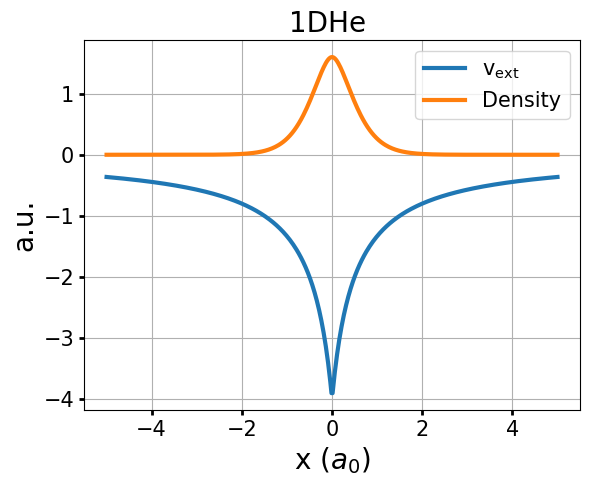

In [7]:
#---------------> Plot
fig, ax = plt.subplots(1, 1)#, dpi=200)
#---------------> Data
ax.plot(x, v_ext, linewidth=3, label=r"$\rm v_{ext}$")
ax.plot(x, unweighted_ground_State_density, linewidth=3, label="Density")
#---------------> Formatting
ax.set_title(r"1DHe ", fontsize = 20)
ax.set_ylabel(r"a.u.", fontsize = 20)
ax.set_xlabel(r"x ($a_0$)", fontsize = 20)
ax.grid(True)
ax.legend(loc="best", fontsize=15)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
#-------> Borders 
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.0
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [8]:
# Nx = len(x)
# nk = 500
# v_ext = np.zeros(Nx)

# dx = x[1]-x[0]
# diag = (np.ones(Nx)/dx**2)
# # print(diag)
# diags = np.array([(v_ext+diag),(diag/-2),(diag/-2)])

# H = spa.dia_matrix((diags,[0,-1,1]),shape=(Nx,Nx))
# vals, vecs = eigsh(H,which='SA',k=nk)

# vec_sum = np.trapz(vecs[:,0]**2,x)
# norm = np.sqrt(1/vec_sum)
# vecs = vecs*norm
iDEA_vecs = []
iDEA_vals= []
iDEA_dens= []
for i in range(0, len(ks)):
    # print(i)
    state = excited_states[i]
    iDEA_vals.append(state.energy)
    iDEA_vecs.append(state.space)
    iDEA_dens.append(iDEA.observables.density(He, state))
    #convert lists to arrays 
    iDEA_vals_array = np.array(iDEA_vals)
    iDEA_dens_array = np.array(iDEA_dens)
    iDEA_vecs_array = np.array(iDEA_vecs[i])

In [14]:
taus = np.linspace(1000000,5000000,499)
mus = np.linspace(-5,5,10000)
dtau = taus[1]-taus[0]
mus = [] #np.empty(len(taus))
Nes = [] #np.empty(len(taus))
mu0s = [] #np.empty(len(taus))
mu1s= [] #np.empty(len(taus))
mu_upper = []#np.empty(len(taus))
# print(simps(iDEA_dens_array[0,:], x))
mu0 = 1
mu1 = 100
print('Testing density weighter')
test = tit.density_weighter(init_dens=iDEA_dens_array, dens_type=2, Ei=iDEA_vals_array, tau=1000000, mu=0.001, N=1)
print(f"The maximum value of the density is: {np.max(test)}")
print('Done testing density weighter \n')

print('Testing the secant method')
test2 = tit.particle_number_shifter_function(iDEA_dens_array, dens_type=2, Ei=iDEA_vals_array, tau=1000000, N=1, x=x, target_Ne=1)
print(f"The maximum of the particle nummber function is {np.max(test2)}")


dummy1, dummy2 = tit.secant_method(test2, mu0, mu1, 10000, 1)
# for i,tau in enumerate(taus):
#     mu_upper.append(mu1)
     
#     func = tit.particle_number_shifter_function(init_dens=iDEA_dens_array, dens_type=2, Ei=iDEA_vals_array, tau=tau, target_Ne=2, x=x, N=1)
#     # func = tit.particle_number_shifter_function(tau=tau, iDEA_vals_array[i],iDEA_vecs [i],x=x, target_Ne=2)
#     mu1,fx0 = tit.secant_method(function=func, guess1=mu0, guess2=mu1, print_opt=0, max_iter=1000)
    
#     mu0s.append(mu0)
#     mu1s.append(mu1)
    
#     mus.append(mu1)
#     Nes.append(tit.particle_number_shifter_function(init_dens=iDEA_dens_array, dens_type=2, Ei=iDEA_vals_array, tau=tau, target_Ne=2, x=x, N=1))
    
#     mu0 = mu1-(dtau+(.1*dtau*i))

Testing density weighter
The maximum value of the density is: 2.5995397483005876e-69
Done testing density weighter 

Testing the secant method
The maximum of the particle nummber function is <function particle_number_shifter_function.<locals>.particle_number_shift at 0x107e22e80>
For iteration number 1, the value of x is inf
The error estimate is inf
For iteration number 2, the value of x is nan
The error estimate is nan


/Users/aosborne3/Desktop/Inversion_testing/iDEA_inversions_testing/FT/1DHe/tit.py:115: RuntimeWarning: divide by zero encountered in scalar divide
  root = x2 - fx2 * (numerator/denominator)
/Users/aosborne3/Desktop/Inversion_testing/iDEA_inversions_testing/FT/1DHe/tit.py:81: RuntimeWarning: invalid value encountered in divide
  w = w/partition_function


In [10]:
# #---------------> Plot
# fig, ax = plt.subplots(1, 1)#, dpi=200)
# #---------------> Data
# # ax.plot(x, v_ext, linewidth=3, label=r"$\rm v_{ext}$")
# # ax.plot(x, unweighted_ground_State_density, linewidth=3, label="Density")
# ax.plot(x, test, linewidth=3, label="test density")
# #---------------> Formatting
# ax.set_title(r"Quantum Harmonic Oscillator", fontsize = 20)
# ax.set_ylabel(r"a.u.", fontsize = 20)
# ax.set_xlabel(r"x ($a_0$)", fontsize = 20)
# ax.grid(True)
# ax.legend(loc="best", fontsize=15)
# ax.xaxis.set_tick_params(width=2)
# ax.yaxis.set_tick_params(width=2)
# #-------> Borders 
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 2.0
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.show()

In [11]:
for i,mu in enumerate(mus):
    weighted_density = tit.density_weighter(init_dens=iDEA_dens_array, dens_type=2, Ei=iDEA_vals_array, mu=mu, tau=tau, N=1)

NameError: name 'weighted_density' is not defined

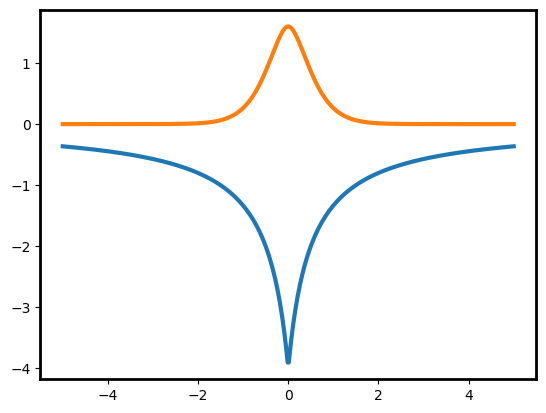

In [12]:
#---------------> Plot
fig, ax = plt.subplots(1, 1)#, dpi=200)
#---------------> Data
ax.plot(x, v_ext, linewidth=3, label=r"$\rm v_{ext}$")
ax.plot(x, unweighted_ground_State_density, linewidth=3, label="Density")
ax.plot(x, weighted_density, linewidth=3, label="weighted Density")
#---------------> Formatting
ax.set_title(r"Quantum Harmonic Oscillator", fontsize = 20)
ax.set_ylabel(r"a.u.", fontsize = 20)
ax.set_xlabel(r"x ($a_0$)", fontsize = 20)
ax.grid(True)
ax.legend(loc="best", fontsize=15)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
#-------> Borders 
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.0
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
#Testing inversion
iDEA.reverse_engineering.reverse(He, target_n=weighted_density, method=iDEA.methods.non_interacting, scheme=2, tol=1e-6, occs_calc=True, chem_u=mu, tau=tau)

iDEA.Wang-Parr_inversion.thermal: convergence = 1.0, tolerance = 1e-06
